In [107]:
import numpy as np
import matplotlib.pyplot as plt
%autosave 60

Autosaving every 60 seconds


In [2]:
data=abs(np.loadtxt('output.txt'))
T=data[:,0]
E=data[:,1]
C=data[:,2]
M=data[:,3]
X=data[:,4]

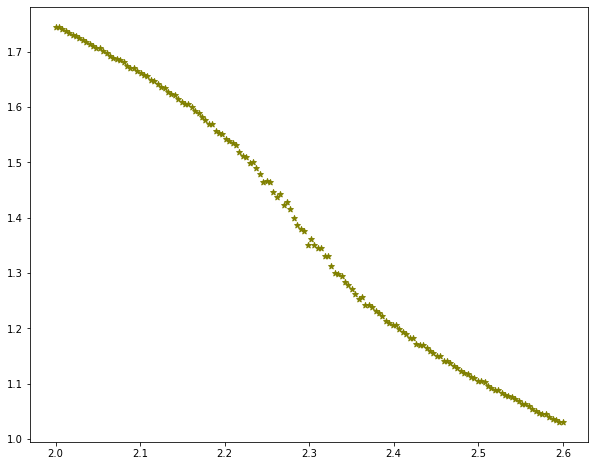

In [103]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(T,E, marker = '*', color = 'olive')

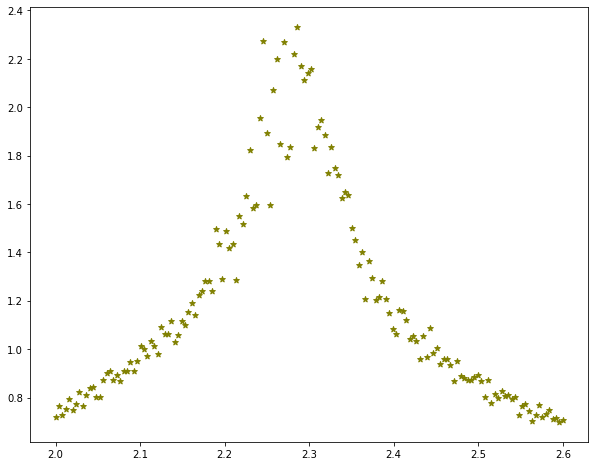

In [104]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(T,C, marker = '*', color = 'olive')


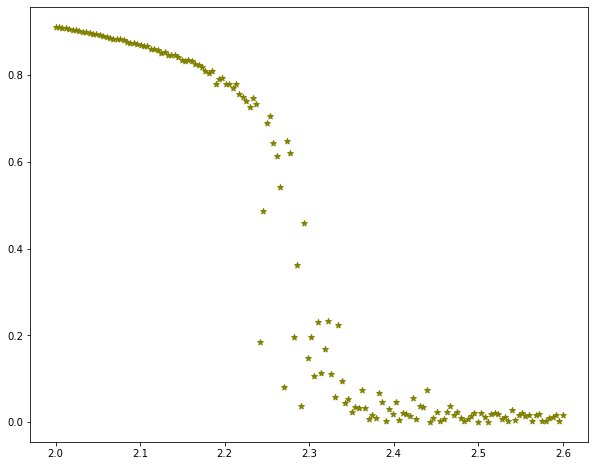

In [105]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(T,M, marker = '*', color = 'olive')

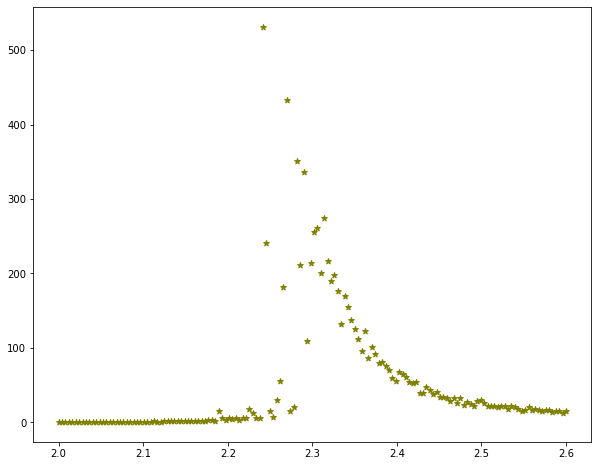

In [106]:
fig, ax = plt.subplots(figsize = (10,8))


ax.scatter(T,X, marker = '*', color = 'olive')

In [11]:
Tm=np.array([])
TM=np.array([])
index=0
for i in range(len(T)):
    if(T[i]<2.28):
        index+=1;
        Tm=np.append(Tm,-1*(T[i]-2.28))
    if(T[i]>2.28):
        TM=np.append(TM,(T[i]-2.28))
index, len(T)-index

(70, 80)

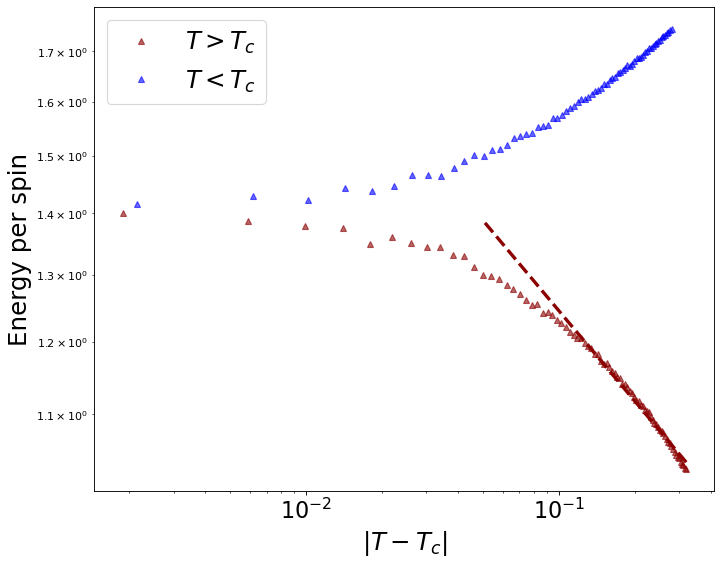

In [47]:
fig, ax = plt.subplots(figsize = (10,8),num=None, dpi=80, facecolor='w', edgecolor='k')
ax.plot(TM,E[0:80],'.', color = 'darkred', label='$T>T_{c}$', marker = '^', alpha = .6 )
ax.plot(Tm,E[80:150],'b.', label='$T<T_{c}$', marker = '^', alpha = .6 )
ax.legend(fontsize = 22)
ax.set_xlabel('|$T-T_{c}$|', fontsize = 22)
ax.set_ylabel('Energy per spin', fontsize = 22)
ax.tick_params(labelsize = 20)
ax.set_xscale('log')
ax.set_yscale('log')
def func(x, a, b):
    return a + b*x
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, np.log(TM[:-25]),np.log(E[:80][:-25]))
a=popt[0]
b=popt[1]
ax.plot(TM[:-12],np.exp(func(np.log(TM[:-12]),*popt)), color = 'darkred', linewidth = 3, linestyle = '--')


(0.518856003352852, 0.4868971900663513)

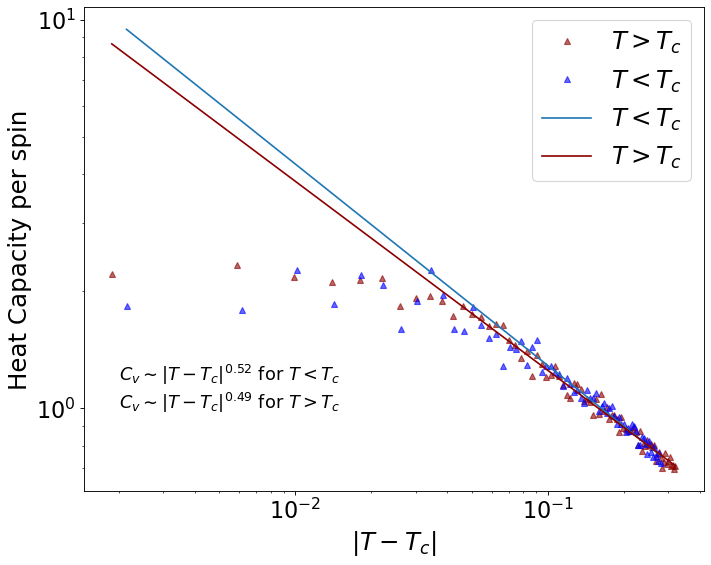

In [91]:
fig, ax = plt.subplots(figsize = (10,8),num=None, dpi=80, facecolor='w', edgecolor='k')
ax.loglog(TM,C[0:80],'^', color = 'darkred', label='$T>T_{c}$', alpha = .6)
ax.loglog(Tm,C[80:150],'b^', label='$T<T_{c}$', alpha = .6)
ax.set_xlabel('|$T-T_{c}$|', fontsize = 22)
ax.set_ylabel('Heat Capacity per spin', fontsize = 22)
ax.tick_params(labelsize = 20)
def funcC(x, a, b):
    return a - b*x
from scipy.optimize import curve_fit
popt, pcov = curve_fit(funcC,np.log(Tm[20:]),np.log(C[80:150][20:]))
popt2, pcov2 = curve_fit(funcC,np.log(TM[:-20]),np.log(C[0:80][:-20]))
a=popt[0]
b=popt[1]
a2=popt2[0]
b2=popt2[1]
ax.loglog(Tm,np.exp(funcC(np.log(Tm),a,b)),label='$T<T_{c}$')
ax.loglog(TM,np.exp(funcC(np.log(TM),a2,b2)),label='$T>T_{c}$', color = 'darkred')
plt.legend(fontsize = 22)
eq='$C_{v} \sim |T-T_{c}|^{%.2f}$ for $T<T_{c}$ \n$C_{v} \sim |T-T_{c}|^{%.2f}$ for $T>T_{c}$'%(b, b2)
plt.text(0.002,1,eq,fontsize=16)
plt.savefig('Alpha_fit_2021.pdf')
b,b2

(0.11858716903679432, -0.8347619731295883)

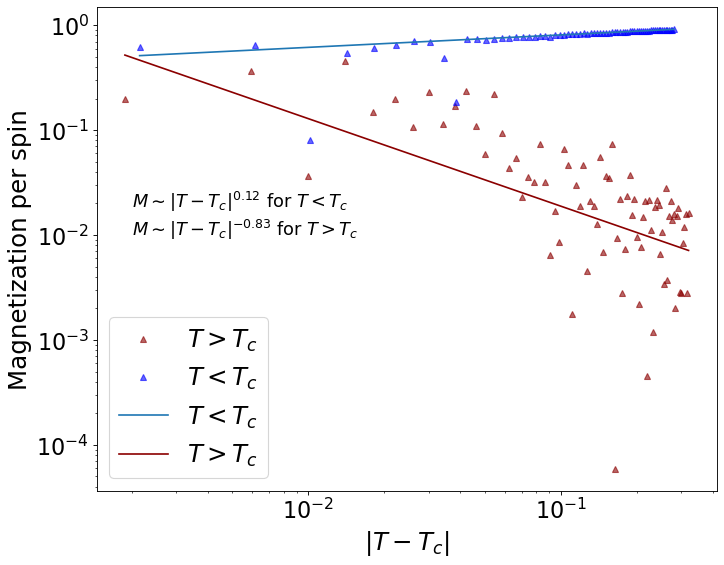

In [95]:
fig, ax = plt.subplots(figsize = (10,8),num=None, dpi=80, facecolor='w', edgecolor='k')
ax.loglog(TM,M[0:80],'^', color = 'darkred', label='$T>T_{c}$', alpha = .6)
ax.loglog(Tm,M[80:150],'b^', label='$T<T_{c}$', alpha = .6)
ax.set_xlabel('|$T-T_{c}$|', fontsize = 22)
ax.set_ylabel('Magnetization per spin', fontsize = 22)
ax.tick_params(labelsize = 20)
def funcM(x, a, b):
    return a + b*x
from scipy.optimize import curve_fit
popt, pcov = curve_fit(funcM,np.log(Tm[20:]),np.log(M[80:150][20:]))
popt2, pcov2 = curve_fit(funcM,np.log(TM[:-20]),np.log(M[0:80][:-20]))
a=popt[0]
b=popt[1]
a2=popt2[0]
b2=popt2[1] 
ax.loglog(Tm,np.exp(funcM(np.log(Tm),a,b)),label='$T<T_{c}$')
ax.loglog(TM,np.exp(funcM(np.log(TM),a2,b2)),label='$T>T_{c}$', color = 'darkred')
plt.legend(fontsize = 22)
eq='$M \sim |T-T_{c}|^{%.2f}$ for $T<T_{c}$ \n$M \sim |T-T_{c}|^{%.2f}$ for $T>T_{c}$'%(b, b2)
plt.text(0.002,0.01,eq,fontsize=16)
plt.savefig('Beta_fit_2021.pdf')
b,b2

(1.9662095132419029, 1.533114576630226)

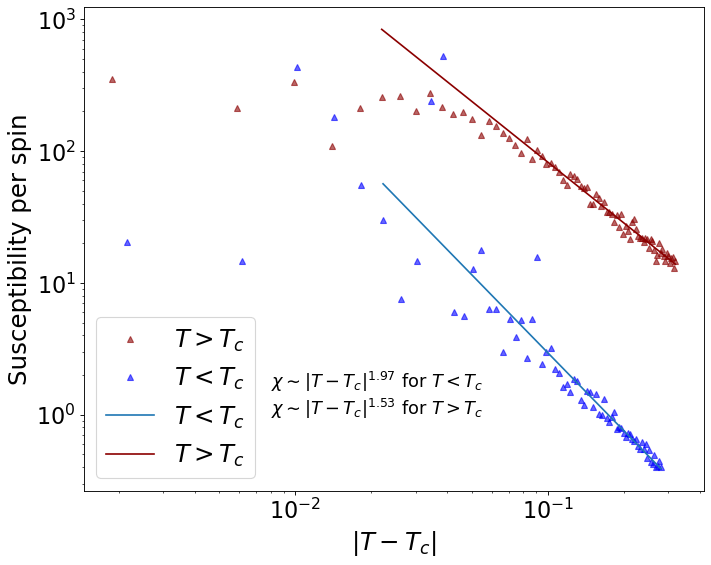

In [94]:
fig, ax = plt.subplots(figsize = (10,8),num=None, dpi=80, facecolor='w', edgecolor='k')
ax.loglog(TM,X[0:80],'^', color = 'darkred', label='$T>T_{c}$', alpha = .6)
ax.loglog(Tm,X[80:150],'b^', label='$T<T_{c}$', alpha = .6)
ax.set_xlabel('|$T-T_{c}$|', fontsize = 22)
ax.set_ylabel('Susceptibility per spin', fontsize = 22)
ax.tick_params(labelsize = 20)
def funcX(x, a, b):
    return a - b*x
from scipy.optimize import curve_fit
popt, pcov = curve_fit(funcX,np.log(Tm[20:]),np.log(X[80:150][20:]))
popt2, pcov2 = curve_fit(funcX,np.log(TM[:-20]),np.log(X[0:80][:-20]))
a=popt[0]
b=popt[1]
a2=popt2[0]
b2=popt2[1]
ax.loglog(Tm[5:],np.exp(funcX(np.log(Tm[5:]),a,b)),label='$T<T_{c}$')
ax.loglog(TM[:-5],np.exp(funcX(np.log(TM[:-5]),a2,b2)),label='$T>T_{c}$', color = 'darkred')
plt.legend(fontsize = 22)
eq='$\chi \sim |T-T_{c}|^{%.2f}$ for $T<T_{c}$ \n$\chi \sim |T-T_{c}|^{%.2f}$ for $T>T_{c}$'%(b, b2)
plt.text(0.008,1,eq,fontsize=16)
plt.savefig('Gamma_fit_2021.pdf')
b,b2